<div style="text-align: center;">
    <h2 style="color: #007BFF;">DEP Task 2 : Predict house prices Model</h2>
</div>


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


<div style="text-align: center;">
   <h2 style="color: #007BFF;">My Introduction</h2>
</div>

👋 Greetings, all! I'm Zeeshan Ahmad, an aspiring data enthusiast with a keen interest in exploring machine learning techniques. I am thrilled to share my analysis and insights from a comprehensive housing dataset. Using linear regression, I have built a model to predict house prices based on various features.Join me in exploring this fascinating dataset and discover intriguing patterns and trends in house pricing!


<div style="text-align: left;">
   <h2 style="color: #007BFF;">Connect with Me</h2>
</div>
<div style="text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <a href="https://www.linkedin.com/in/zeeshan--ahmed" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn">
    </a>
    <br>
    <a href="https://www.kaggle.com/zeeshanahmad124586" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle" alt="Kaggle">
    </a>
    <br>
    <a href="https://github.com/zeeshanAhmed2798" rel="noreferrer nofollow" style="margin: 0px 10px;">
        <img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub">
    </a>
</div>


In [72]:
df=pd.read_excel("D:\Data Sciences\DEP\DEP_Tasks\Task2\dataSet.xlsx")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\zeeshan_ahmed\AppData\Local\Temp\ipykernel_16000\3013435426.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_excel("D:\Data Sciences\DEP\DEP_Tasks\Task2\dataSet.xlsx")


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Exploration

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [74]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [75]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## uni and Bivariate analysis

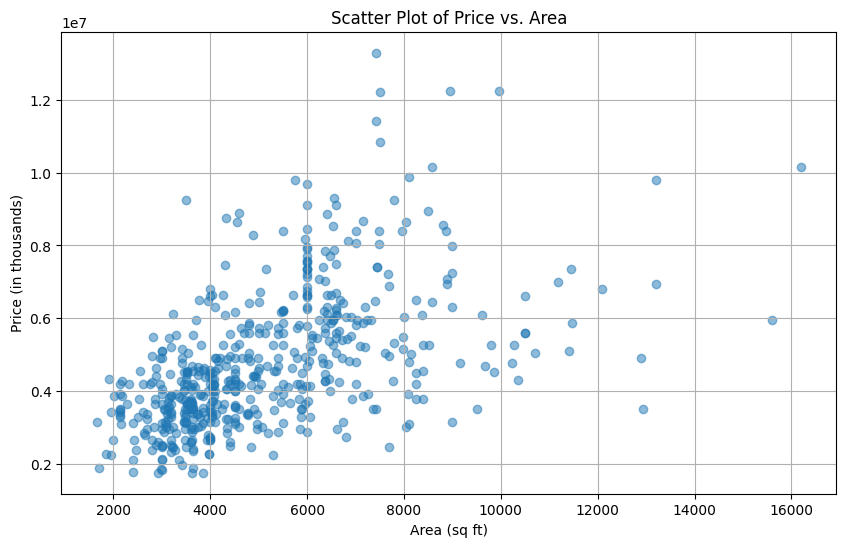

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs. Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (in thousands)')
plt.grid(True)
plt.show()

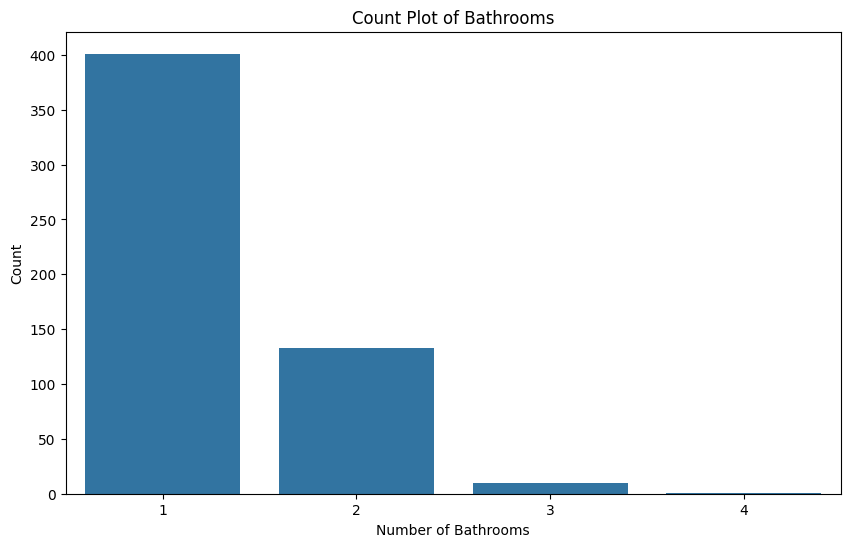

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bathrooms')
plt.title('Count Plot of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

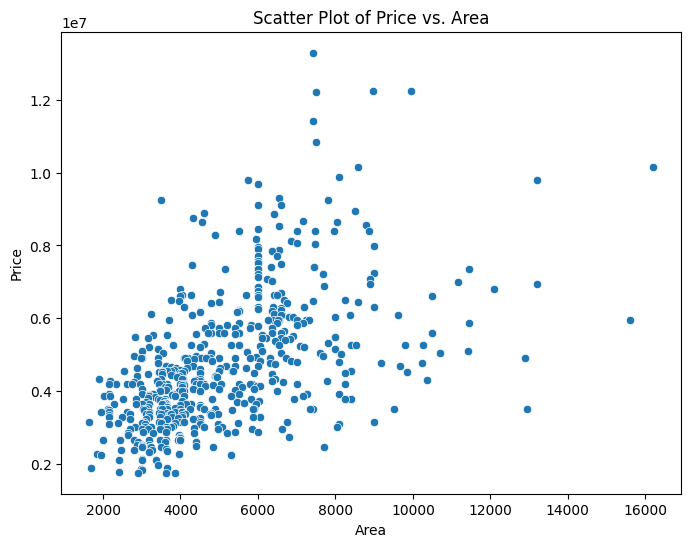

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='area', y='price')
plt.title('Scatter Plot of Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

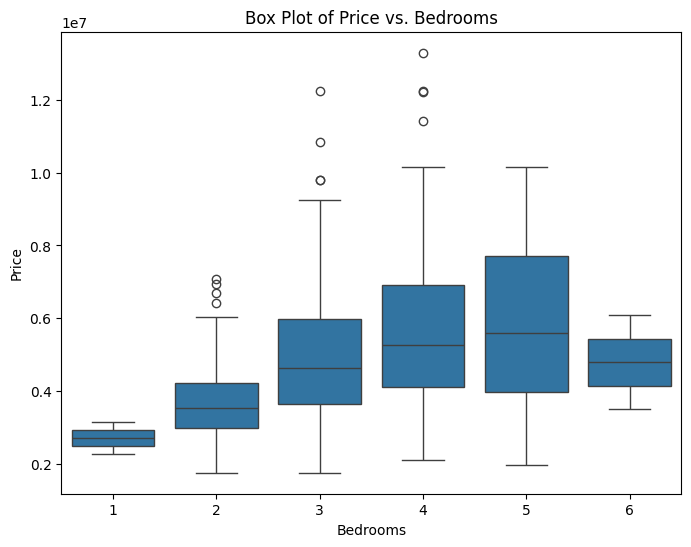

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Box Plot of Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


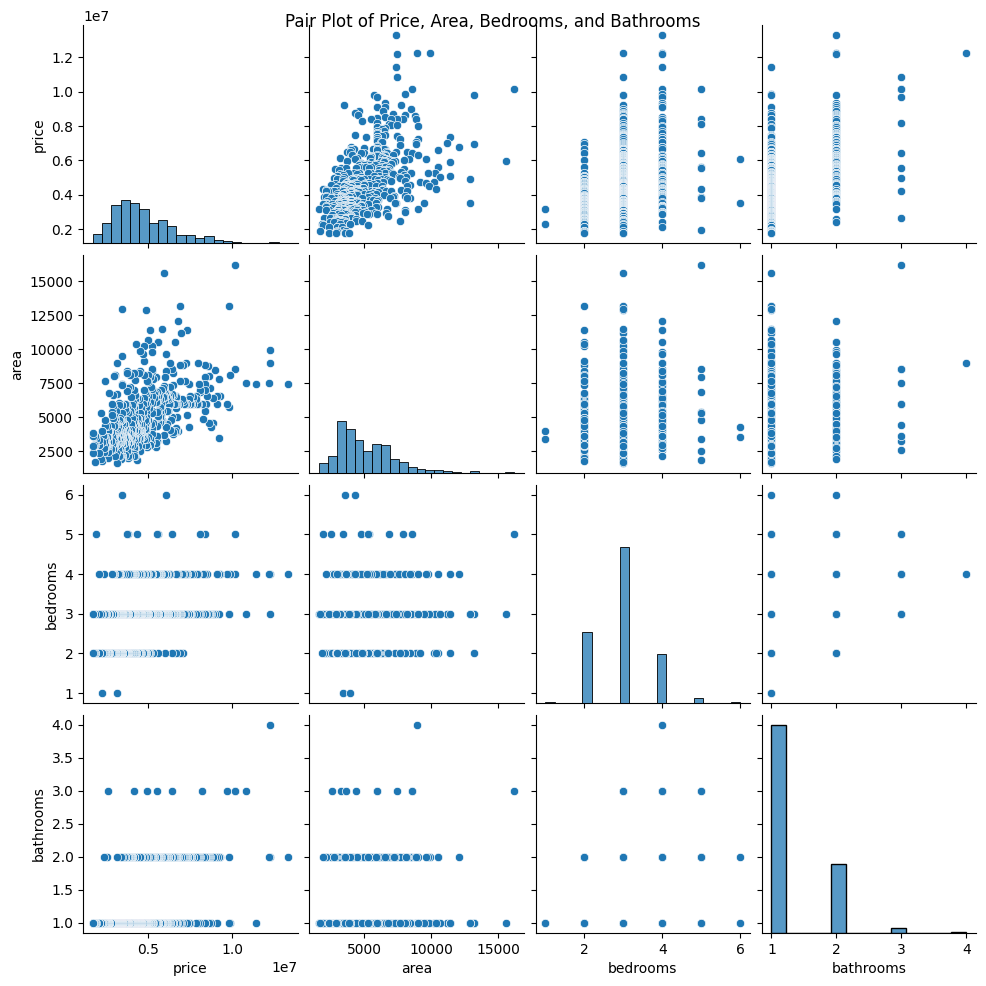

In [80]:
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms']])
plt.suptitle('Pair Plot of Price, Area, Bedrooms, and Bathrooms')
plt.show()


## Feature engineering

In [81]:
encoder=LabelEncoder()

In [82]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [83]:
encodingCol=['mainroad','guestroom','basement','hotwaterheating','airconditioning','furnishingstatus','prefarea']
for col in encodingCol:
    df[col]=encoder.fit_transform(df[col])

In [84]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [85]:
x=df.drop(columns=['price'],axis=1)
y=df['price'] # values to pridict

In [86]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Linear Regression Approach

In [88]:
ln_model=LinearRegression()
ln_model.fit(x_train,y_train)

LinearRegression()

In [89]:
y_pred=ln_model.predict(x_test)

In [90]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [91]:
mse

0.01328124372927074

In [92]:
mae

0.08482075249315935

In [93]:
ln_acc=r2_score(y_test,y_pred)
ln_acc

0.6494754192267793

## Random Forest Regression.

In [94]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 
        'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = df['price']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [97]:
y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean Squared Error (MSE): 2062716152594.001
R-squared (R2): 0.5919106764656096


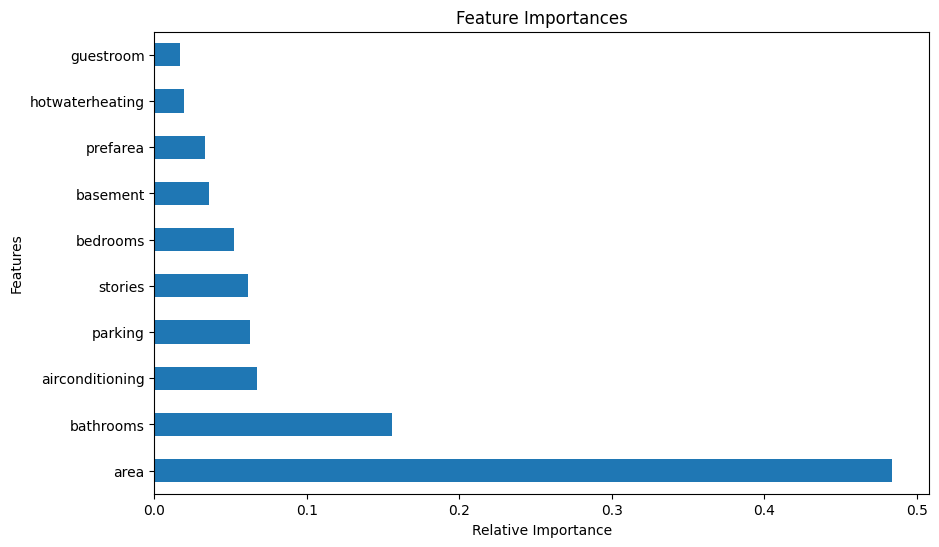

In [98]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()